# Feature selection with L1 Regularization

* Consider a supervised learning setting where you have data $\mathcal{D} = \{(X, Y)\}$, where $X \in \mathbb{R}^{NXD}$. $N$  - num of datapoints and $D$ - num of features. Many of the features may be irrelevant for the task at hand.
* Typically when there are more features than samples, ie. $D >> N$, a simple linear regression model is prone to overfit.
* As we have seen before, regularization is one of the tools in our toolbox to combat overfitting. Here we will see how they do that and how $L1$ regularization can be used for feature selection.

## Tasks

1.  Load the data "cancer_reg.csv" data from [here](https://data.world/nrippner/ols-regression-challenge). A slightly modified copy will be shared with you on workplace. Target is labeled "TARGET_deathRate".
2. Preprocess your data particularly making sure there are no nan values.
3. Split the data into 20\% train and 80\% test sets.
4. Define your linear regression model with and without regularization ($L1$ and $L2$)
5. Train and test your linear regression models (without regularization) till it overfits the data. Plot the learning curves for training and testing (You may ignore loss values for the first 10 epochs)
6. Train and test again with regularization and visually inspect the effects.
7. Plot the weights for each model (using matplotlib stem plot). Do you see any difference between them?
8. In the case of the $L1$ regularization, set a small threshold and remove all features of the data corresponding to the weights with values below this threshold.
9. Train a new model with remaining features (with or without regularization)


In [ ]:
import numpy as np
import pandas as pd

Load the data "cancer_reg.csv" data from here. A slightly modified copy will be shared with you on workplace. Target is labeled "TARGET_deathRate".

In [ ]:
class Dataset:
  def __init__(self, path, test_size=0.8):
    self.test_size = test_size
    self.initialize(path)
    
  def initialize(self, path):
    data = pd.read_csv(path)
    for col in data.columns:
      if data[col].isna().sum()!=0:
        data[col][data[col].isna()] = data[col].mean()
        
    data = data.drop("Unnamed: 0", axis=1)
    target = data["TARGET_deathRate"].values
    inputs = data.drop("TARGET_deathRate", axis=1).values
    inputs = inputs/inputs.max(axis=0)

    self.target = target
    self.inputs = inputs

    indices = np.arange(len(self.target))
    np.random.shuffle(indices)
    test_num_points = int(self.test_size * len(indices))
    test_indices = indices[:test_num_points]
    train_indices = indices[test_num_points:]

    self.train_inputs = self.inputs[train_indices]
    self.test_inputs = self.inputs[test_indices]
    self.train_targets = self.target[train_indices]
    self.test_targets = self.target[test_indices]
  


    

In [ ]:
dataset = Dataset("cancer-mortality-rate.csv")

FileNotFoundError: ignored

(610, 279)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print("train inputs shape: ",dataset.train_inputs.shape)
print("test inputs shape: ",dataset.test_inputs.shape)

train inputs shape:  (610, 279)
test inputs shape:  (2437, 279)


In [ ]:
class LinearRegressionModel:
  def __init__(self, dataset, l1 = 0.9, l2 = 0.01, lr = 0.001, epochs=10000):
    self.dataset = dataset
    self.l1 = l1
    self.l2 = l2
    self.learning_rate = lr
    self.epochs = epochs
    self.theta = np.random.randn(dataset.train_inputs.shape[1]+1)
  def add_one(self, x):
    ones = np.ones((len(x), 1))
    x = np.concatenate([x,  ones], axis=1)
    return x

  def inference(self, x):
    return x @ self.theta
  def compute_mse_loss(self, y_true, y_pred):
    return ((y_true - y_pred)**2).mean()
  def plot(self, train_losses, test_losses):
    plt.figure()
    plt.title("losses")
    plt.plot(train_losses[10:], label="train-loss")
    plt.plot(test_losses[10:], label="test-loss")
    plt.legend()
    plt.figure()
    plt.title("Theta values")
    plt.stem(self.theta)
    plt.show()
  def train(self):
    train_losses = []
    test_losses = []
    for epoch in range(self.epochs):
      batch_size = 32
      if (len(self.dataset.train_inputs) % batch_size ) == 0:
        number_of_batches = len(self.dataset.train_inputs)//batch_size
      else:
        number_of_batches = len(self.dataset.train_inputs)//batch_size + 1
      epoch_losses = []
      for batch_number in range(number_of_batches):
        x = self.dataset.train_inputs[batch_number * batch_size: (batch_number + 1) * batch_size]
        y = self.dataset.train_targets[batch_number * batch_size: (batch_number + 1) * batch_size]
        x = self.add_one(x)
      
        y_pred = self.inference(x)

        gradient = x.T @ (self.inference(x) - y)
        if self.l1 != 0.0:
          l1_norm_grad =((self.theta > 0).astype(float) * 2 - 1) * self.l1
        else:
          l1_norm_grad = 0
        
        if self.l2 != 0.0:
          l2_norm_grad = self.theta * self.l2
        else:
          l2_norm_grad = 0
        gradient = gradient + l1_norm_grad + l2_norm_grad
        
        self.theta -= gradient * self.learning_rate

        loss = self.compute_mse_loss(y_pred, y)
        epoch_losses.append(loss)

      train_losses.append(np.mean(epoch_losses))
      
      test_inputs = self.dataset.test_inputs
      test_inputs = self.add_one(test_inputs)
      y_pred_test = self.inference(test_inputs)
      test_loss = self.compute_mse_loss(self.dataset.test_targets, y_pred_test)
      test_losses.append(test_loss)
      if epoch % 1000==0:
        print("Epoch: {} train - loss: {}".format(epoch, np.mean(epoch_losses), test_loss))
    self.plot(train_losses, test_losses)





In [ ]:
model = LinearRegressionModel(dataset, l2=0.0, l1=0.0)

Epoch: 0 train - loss: 3932.4014667843594
Epoch: 1000 train - loss: 350.63095699181633
Epoch: 2000 train - loss: 332.28595332053254
Epoch: 3000 train - loss: 323.46024921620005
Epoch: 4000 train - loss: 317.58078282493113
Epoch: 5000 train - loss: 313.15505935893714
Epoch: 6000 train - loss: 309.6088347607767
Epoch: 7000 train - loss: 306.6527629265166
Epoch: 8000 train - loss: 304.1204643083883
Epoch: 9000 train - loss: 301.9085514165341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


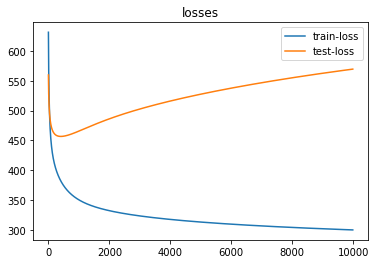

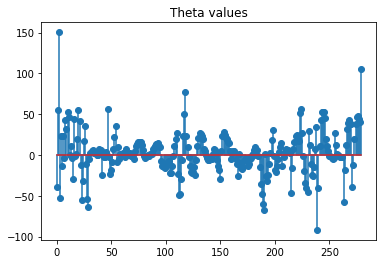

In [ ]:
model.train()

In [ ]:
model = LinearRegressionModel(dataset, l2=0.0, l1=0.9)

Epoch: 0 train - loss: 3988.215719787746
Epoch: 1000 train - loss: 386.86437852433465
Epoch: 2000 train - loss: 377.88910309042575
Epoch: 3000 train - loss: 373.59604037703434
Epoch: 4000 train - loss: 371.67130884316737
Epoch: 5000 train - loss: 370.30975948262386
Epoch: 6000 train - loss: 369.29115773186254
Epoch: 7000 train - loss: 368.47474442693516
Epoch: 8000 train - loss: 367.78914215329013
Epoch: 9000 train - loss: 367.19054642675377


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


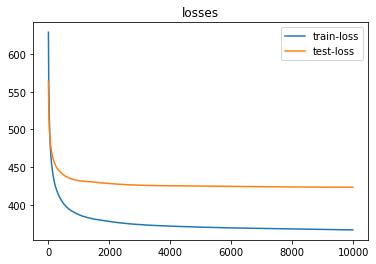

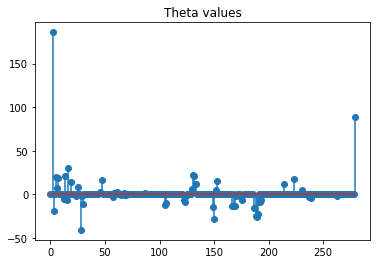

In [ ]:
model.train()

In [ ]:
threshold = 0.005


In [ ]:
important_features = model.theta > threshold

In [ ]:

# model.dataset.train_inputs = model.dataset.train_inputs[:, important_features[:-1]]

model.dataset.test_inputs = model.dataset.test_inputs[:, important_features[:-1]]

In [ ]:
model.theta = np.random.randn(model.dataset.train_inputs.shape[1]+1)

In [ ]:
model.theta.shape

(77,)

In [ ]:

model.dataset.train_inputs.shape

(610, 76)

Epoch: 0 train - loss: 7194.341822000705
Epoch: 1000 train - loss: 429.4487229538736
Epoch: 2000 train - loss: 421.43830924431796
Epoch: 3000 train - loss: 418.6646538765128
Epoch: 4000 train - loss: 417.3690383215454
Epoch: 5000 train - loss: 416.26043815564134
Epoch: 6000 train - loss: 414.76204777744834
Epoch: 7000 train - loss: 413.82732469198845
Epoch: 8000 train - loss: 413.064027810425
Epoch: 9000 train - loss: 412.43329451115017


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


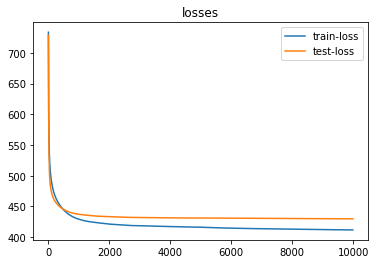

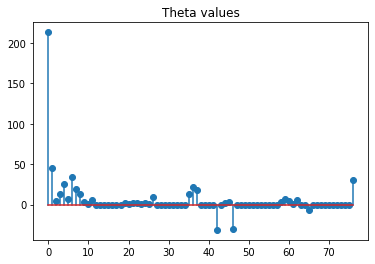

In [ ]:
model.train()